In [14]:
#Importing the required libraries

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Retrieving the California Housing Dataset

from sklearn.datasets import fetch_california_housing


data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [16]:
#Converting the data to a DataFrame

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
df['target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


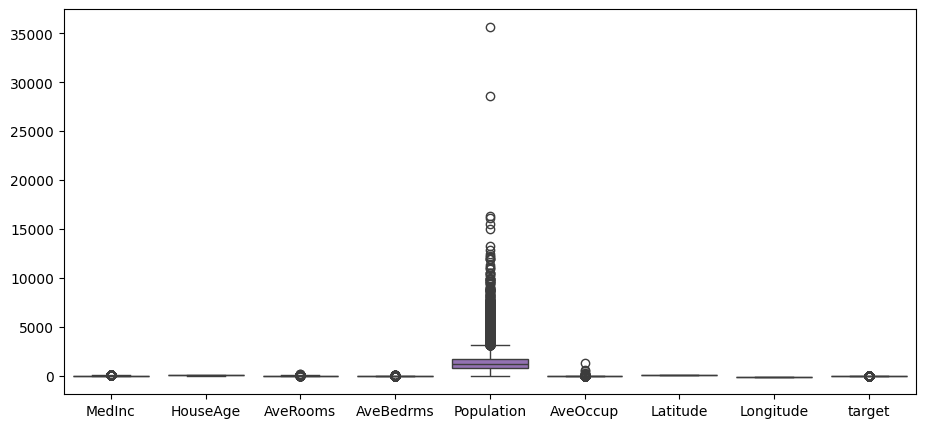

In [18]:
#Checking for outliers in the dataset

plt.figure(figsize=(11,5))
sns.boxplot(df)
plt.subplots_adjust()
plt.show()

Removing outliers

In [19]:
clean_df = df.copy()
from scipy import stats

for column in df.columns:
    z_scores = stats.zscore(df[column])
    clean_df = clean_df[(z_scores >= -3) & (z_scores <= 3)]

print(clean_df.shape)

(19794, 9)


C:\Users\USER\AppData\Local\Temp\ipykernel_7272\157260645.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(z_scores >= -3) & (z_scores <= 3)]
C:\Users\USER\AppData\Local\Temp\ipykernel_7272\157260645.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(z_scores >= -3) & (z_scores <= 3)]
C:\Users\USER\AppData\Local\Temp\ipykernel_7272\157260645.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(z_scores >= -3) & (z_scores <= 3)]
C:\Users\USER\AppData\Local\Temp\ipykernel_7272\157260645.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(z_scores >= -3) & (z_scores <= 3)]
C:\Users\USER\AppData\Local\Temp\ipykernel_7272\157260645.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(z_scores >= -3) & (z_scores <= 3)]
C:\Users\U

In [22]:
clean_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
#Feature Engineering
x = clean_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = clean_df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

model = Ridge(alpha = 1.0)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

r2 = r2_score(y_predict, y_test)
mse = mean_squared_error(y_predict, y_test)
print('R2 Score:',round(r2*100, 2), '%')
print('MSE Score: ',round(mse*100,2), '%')

R2 Score: 39.69 %
MSE Score:  47.31 %


In [24]:
#Getting the prediction score

score = model.score(x_test, y_test)
print('Model Score: ',round(score*100, 2), '%')

Model Score:  61.62 %
